In [2]:
import pandas as pd

In [56]:
lines = ['111', '111', '117', '117']
lat = [52.23312749177165, 52.239184825276396, 52.237996088369876, 52.23226459286634]
lon = [21.019626295412838, 21.017303196032262, 21.050034242560585, 21.022349324437076]

time = ['2021-06-27 15:00:00', '2021-06-27 15:04:00', '2021-06-27 15:00:00', '2021-06-27 15:09:00']

vehicleNumber = [1, 1, 2, 2, 3]
brigade = [1, 1, 2, 2]

list_of_tuples = list(zip(lines, lon, vehicleNumber, time, brigade, lat))

df = pd.DataFrame(list_of_tuples, columns=['Lines', 'Lon', 'VehicleNumber', 'Time', 'Brigade', 'Lat'])


In [57]:
df

,Lines,Lon,VehicleNumber,Time,Brigade,Lat
0,111,21.019626,1,2021-06-27 15:00:00,1,52.233127
1,111,21.017303,1,2021-06-27 15:04:00,1,52.239185
2,117,21.050034,2,2021-06-27 15:00:00,2,52.237996
3,117,21.022349,2,2021-06-27 15:09:00,2,52.232265


In [30]:
df = pd.concat([df]*2)

In [31]:
df

,Lines,Lon,VehicleNumber,Time,Brigade,Lat
0,111,21.019626,0001,2021-06-27 15:00:00,1,52.233127
1,111,21.017303,0001,2021-06-27 15:04:00,1,52.239185
2,117,21.050034,0002,2021-06-27 15:00:00,2,52.237996
3,117,21.022349,0002,2021-06-27 15:09:00,2,52.232265
0,111,21.019626,0001,2021-06-27 15:00:00,1,52.233127
1,111,21.017303,0001,2021-06-27 15:04:00,1,52.239185
2,117,21.050034,0002,2021-06-27 15:00:00,2,52.237996
3,117,21.022349,0002,2021-06-27 15:09:00,2,52.232265


In [42]:
list((df.index == [0, 1, 2, 3, 0, 1, 2, 3])) == [True,  True,  True,  True,  True,  True,  True,  True]

True

In [9]:
df[4,] = df.iloc[0]

In [20]:
df.iloc[0]

Lines                            111
Lon                        21.019626
VehicleNumber                   0001
Time             2021-06-27 15:00:00
Brigade                            1
Lat                        52.233127
4                                NaN
(4,)                             NaN
Name: 0, dtype: object

In [32]:
df.shape

(8, 6)

In [35]:
'Lat' in df.columns

True

In [43]:
import spacial_data_analysis_ztm

In [44]:
df

,Lines,Lon,VehicleNumber,Time,Brigade,Lat
0,111,21.019626,0001,2021-06-27 15:00:00,1,52.233127
1,111,21.017303,0001,2021-06-27 15:04:00,1,52.239185
2,117,21.050034,0002,2021-06-27 15:00:00,2,52.237996
3,117,21.022349,0002,2021-06-27 15:09:00,2,52.232265
0,111,21.019626,0001,2021-06-27 15:00:00,1,52.233127
1,111,21.017303,0001,2021-06-27 15:04:00,1,52.239185
2,117,21.050034,0002,2021-06-27 15:00:00,2,52.237996
3,117,21.022349,0002,2021-06-27 15:09:00,2,52.232265


In [58]:
# oryginalny CRS ze strony ztm crs='EPSG:4326'
ztm_crs = 'EPSG:4326'
gdf = spacial_data_analysis_ztm.covert_long_lat_into_geodataframe(df, ztm_crs)

<AxesSubplot:>

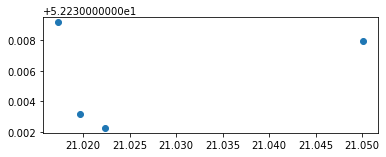

In [59]:
gdf.plot()

In [60]:
gdf = gdf.to_crs(epsg=2178)

In [61]:
gdf = spacial_data_analysis_ztm.sort_vehicle_number_time(gdf)

In [62]:
gdf = spacial_data_analysis_ztm.calculate_distance_timedelta(gdf)

[]

In [65]:
gdf

,Lines,Lon,VehicleNumber,Time,Brigade,Lat,geometry,distance
0,111,21.019626,1,2021-06-27 15:00:00,1,52.233127,POINT (7501340.779 5788837.952),NaN
1,111,21.017303,1,2021-06-27 15:04:00,1,52.239185,POINT (7501181.914 5789511.870),692.389887
2,117,21.050034,2,2021-06-27 15:00:00,2,52.237996,POINT (7503417.737 5789380.646),NaN
3,117,21.022349,2,2021-06-27 15:09:00,2,52.232265,POINT (7501526.833 5788741.997),NaN


In [64]:
gdf.loc[gdf['VehicleNumber'] == 1, 'distance'] = gdf[gdf['VehicleNumber'] == 1].distance(gdf[gdf['VehicleNumber'] == 1].shift())


In [ ]:
gdf.loc[gdf['VehicleNumber'] == vehicle_num, 'TimeDelta'] = \
            gdf.loc[gdf['VehicleNumber'] == vehicle_num, 'Time'] - \
            gdf.loc[gdf['VehicleNumber'] == vehicle_num, 'Time'].shift()